In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [28]:
import os
os.getcwd()

'/Users/sanket/Desktop/IMED Bharati'

In [2]:
data = pd.read_csv("country_locations.csv")
data.head()

,ountry,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [3]:
data.describe()

,latitude,longitude
count,244.000000,244.000000
mean,16.253109,13.294814
std,27.031206,73.976477
min,-75.250973,-177.156097
25%,-0.301710,-38.092008
50%,16.869235,18.182149
75%,38.965238,49.046734
max,77.553604,179.414413


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ountry     244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       245 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [5]:
data.columns

Index(['ountry', 'latitude', 'longitude', 'name'], dtype='object')

#In data their are 1 missing value in column 'ountry', 'latitude', 'longitude'


Now we have to find out the number of row where values are missing.

In [6]:
data.isnull().sum()

ountry       1
latitude     1
longitude    1
name         0
dtype: int64

In [7]:
np.where(data.isna())

(array([156, 226, 226]), array([0, 1, 2]))

# Missing Value imputation


In this case we can get the missing data. 

We will fill the missing values by finding the correct values of lattitude longitude by their respective columns. 

print(data._get_value(156,'ountry'))
print(data._get_value(156,'name'))
data.ountry.replace(np.NaN, "NB",inplace=True) 
data._get_value(156,'ountry')

In [8]:
data._get_value(226,'name')

'U.S. Minor Outlying Islands'

In 226 row country is "U.S. Minor Outlying Islands". 

In [9]:
data.latitude.replace(np.NaN,19.2823,inplace=True)
data.longitude.replace(np.NaN,166.6470,inplace=True)

In [10]:
data.isnull().sum()

ountry       1
latitude     0
longitude    0
name         0
dtype: int64

Now our data is clean. 

We can fit Any algorithm on data. 

But in our data 2 columns are numeric and 2 columns are text.

We can fit K means clustering on only column 'latitude', 'longitude'.

In [11]:
x = data.iloc[:,1:3]

In [12]:
x.head()

,latitude,longitude
0,42.546245,1.601554
1,23.424076,53.847818
2,33.939110,67.709953
3,17.060816,-61.796428
4,18.220554,-63.068615


In [13]:
x.isnull().sum()


latitude     0
longitude    0
dtype: int64

In [14]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

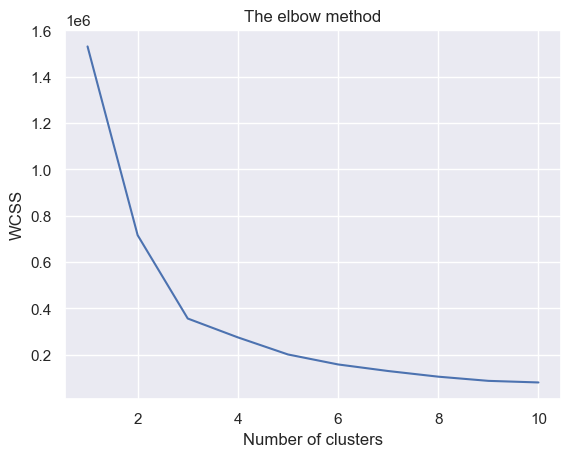

In [15]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [16]:
kMeans = KMeans(3)
kMeans.fit(x)

KMeans(n_clusters=3)

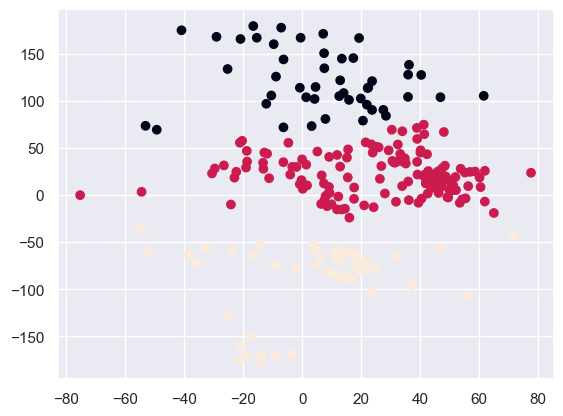

In [17]:
plt.scatter(x.latitude,x.longitude ,c=kMeans.labels_) #plotting the graph of data separation
plt.show()